# Start with a simple hypergraph
* Working with a subset of the Les Miserables example
* Render using the static hnx.draw method

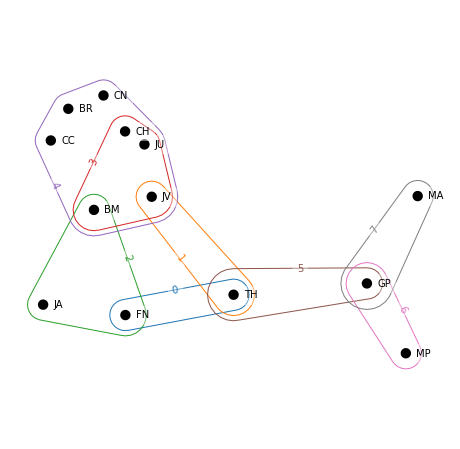

In [1]:
import imp
import hypernetx as hnx

scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP'),
}

H = hnx.Hypergraph(scenes)

hnx.draw(H)

# Render the Hypergraph (interactive)
* Try setting collapse=True

In [2]:
import hnxwidget as hw; imp.reload(hw)

self = hw.HypernetxWidget(H, collapse=False, node_labels={'JV': 'Jean Valjean'})
self

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'elements': [{'uid': 'FN', 'value': 1}]}, {'ele…

# Retreive the position of the nodes
* The member variable synchronizes with the javascript widget 
* The position can be copy/pasted from above to reproduce a previous desireable position

In [3]:
self.pos

{'FN': [245.7403254479649, 147.8127918648048],
 'TH': [167.79083779049185, 252.86387840717515],
 'JV': [354.3050444491767, 315.30005569891705],
 'BM': [401.1952917404732, 242.38478016006084],
 'JA': [326.9431224902649, 108.6668530272829],
 'JU': [428.7103510471328, 311.6071643966148],
 'CH': [406.05689761912276, 382.519489681907],
 'BR': [479.5463915559232, 371.129659499327],
 'CN': [479.8447189220449, 257.56661496213883],
 'CC': [527.9947050208425, 314.4996668503192],
 'GP': [119.31335741297684, 387.8216046702113],
 'MP': [158.76115045245515, 483.31080732785585],
 'MA': [175.78399810757537, 337.5564234598434]}

# Pass the position back into the widget
* Because the position of every node is specified, these are all now "locked"
* You can specify collapse=True/False, collapsing will average the locked positions of the nodes

In [4]:
pos = {'FN': [247.17318854071613, 146.64992982196142],
 'TH': [169.77152619784292, 251.72311956291497],
 'JV': [355.4092055591344, 313.45547952299916],
 'BM': [401.9820537218109, 242.6829578666057],
 'JA': [327.7252813305809, 108.67613381759445],
 'JU': [429.9508733895087, 311.7972952108821],
 'CH': [406.6762517318851, 382.62718971182346],
 'BR': [480.3399419331402, 371.1556786540555],
 'CN': [480.8649018405128, 257.33731618140746],
 'CC': [528.7775282477221, 314.4702649767864],
 'GP': [114.95094740779646, 387.9129241242434],
 'MP': [156.33488649747264, 483.91000815619833],
 'MA': [172.6162088830151, 340.6423075325636]}

hw.HypernetxWidget(H, pos=self.pos, collapse=True, node_labels={'JV': 'Jean Valjean'})

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'elements': [{'uid': 'TH', 'value': 1}]}, {'ele…

# A larger example
* Try setting the granularity to 2
* Try the dual 
* Try collapsing edges

In [5]:
import hnxwidget as hw; imp.reload(hw)
from hypernetx import lesmis as lm
scenes = lm.df_scenes;


granularity = 1

H = hnx.Hypergraph(scenes.groupby(scenes.columns[:granularity].tolist()).Characters.unique().to_dict())

hw.HypernetxWidget(H)

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'elements': [{'uid': 'MY', 'value': 1}, {'uid':…

# The "Sector" Example
* Positions are pre-determined
* Setting collapse=True works fine

In [6]:
import hnxwidget as hw; imp.reload(hw)
import numpy as np

edges = {
    '1':['a', 'b'], 
    '2':['b', 'c'], 
    '3':['b', 'c', 'd'], 
    '4':['a', 'c', 'd'], 
    '5':['a', 'c', 'd', 'e'], 
    '6':['d', 'e', 'f'], 
    '7':['d', 'e', 'g'], 
    '8':['d', 'h'], 
    '9':['e', 'f', 'g'], 
    '10':['d', 'f', 'g'], 
    '11':['f', 'g', 'i'], 
    '12':['g', 'i', 'j'], 
    '13':['i', 'k'], 
    '14':['k', 'l'], 
    '15':['l', 'm'], 
    '16':['i', 'j', 'm', 'o', 'p'], 
    '17':['j', 'm', 'n', 'o', 'p'], 
    '18':['o', 'p', 'q', 'r', 's']
}

pos = {
    'a':[1.5,6],
    'b':[5.5,4],
    'c':[3,3],
    'd':[1.5,1.5],
    'e':[0,3],
    'f':[-1.5,1.5],
    'g':[0,0],
    'h':[3,0],
    'i':[-1.5,-2],
    'j':[0,-2],
    'k':[-3.5,-2],
    'l':[-3.5,-4],
    'm':[-1.5,-4],
    'n':[-0.25,-5],
    'o':[1,-2.5],
    'p':[1,-4],
    'q':[3,-2.5],
    'r':[4,-3.25],
    's':[3,-4]
}

# we need to translate the given position into the pixel coordinate system
margin = 50
width = 400 - margin
xy = np.array(list(pos.values()))
xy = margin + width*(xy - xy.min(axis=0))/(xy.max(axis=0) - xy.min(axis=0))
pos = dict(zip(pos, xy.tolist()))


H = hnx.Hypergraph(edges)

hw.HypernetxWidget(H, collapse=False, pos=pos)

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'elements': [{'uid': 'a', 'value': 1}]}, {'elem…